/usr/local/bin/psi4conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mauricio/.local/lib/python3.9/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(
/home/mauricio/.local/lib/python3.9/site-packages/MDAnalysis/core/universe.py:658: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


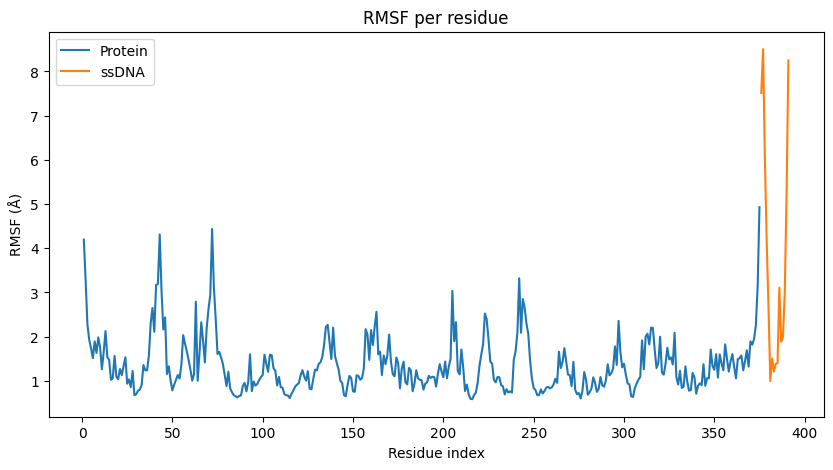

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import RMSF
import numpy as np
import matplotlib.pyplot as plt

# Load the renamed .arc file (now .xyz) as the trajectory
u = mda.Universe("WT_test.pdb", "GProS_6wma_WT.xyz", guess_bonds=False, format='TXYZ')

# Select the protein and DNA residues
protein = u.select_atoms("protein")
dna = u.select_atoms("nucleic")

# Align the trajectory to the first frame
ref = u.select_atoms("protein and name CA")
align.AlignTraj(u, ref, select="protein and name CA", in_memory=True).run()

# Function to calculate the centroid of a group of atoms
def calculate_centroid(atoms):
    return atoms.positions.mean(axis=0)

# Calculate centroids for each residue in each frame
protein_centroids = []
dna_centroids = []

for ts in u.trajectory:
    protein_centroids.append([calculate_centroid(residue.atoms) for residue in protein.residues])
    dna_centroids.append([calculate_centroid(residue.atoms) for residue in dna.residues])

protein_centroids = np.array(protein_centroids)
dna_centroids = np.array(dna_centroids)

# Calculate RMSF for centroids
protein_rmsf = np.sqrt(((protein_centroids - protein_centroids.mean(axis=0))**2).mean(axis=0).sum(axis=1))
dna_rmsf = np.sqrt(((dna_centroids - dna_centroids.mean(axis=0))**2).mean(axis=0).sum(axis=1))

# Plot RMSF for each residue
plt.figure(figsize=(10, 5))
plt.plot(protein.residues.resids, protein_rmsf, label="Protein")
plt.plot(dna.residues.resids, dna_rmsf, label="ssDNA")
plt.xlabel("Residue index")
plt.ylabel("RMSF (Å)")
plt.title("RMSF per residue")
plt.legend()
plt.show()